In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Part 1
Load the titanic dataset fromSeabornby using the load_dataset(‘titanic’) method. Document the columns that aremissing data both numerically (via a count) and visually (via an sns heatmap). Document which values are categorical. Explore the data and answer the following questions: Did more women or men die on the Titanic? Whichpassenger class was more likely to survive? What does the distribution of farelook like? What does the distribution of non-null age values look like? What isthemedian age of each passenger class (pclass)? Visualize this in a box plot.

In [351]:
titanic = sns.load_dataset("titanic")

In [352]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Observing the missing values

In [353]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

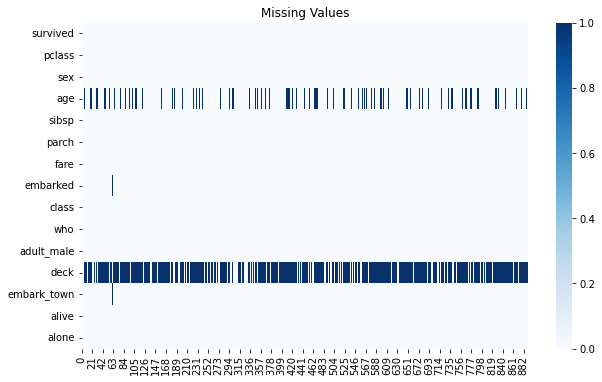

In [354]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.isna().transpose(), cmap='Blues')
plt.title("Missing Values", fontsize=12)
plt.show()

The four attributes with missing data are age (177 missing, continuous), embarked (2 missing, categorical), deck (688 missing, catergorical), and embark_town (2 missing, categorical). 

In the heatmap we can visually see that the deck and age attribute have the highest amount of missing variables. 

### Looking at the Variable Types

In [355]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [356]:
for col in ['sex', 'embarked', 'class', 'who', 'embark_town']:
    titanic[col] = titanic[col].astype('category')

In [357]:
cat_vars = {False:0, True:1, 'yes':1, 'no':0}
for col in ['adult_male', 'alive', 'alone']:
    titanic[col] = titanic[col].map(cat_vars)

In [358]:
titanic.dtypes

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male        int64
deck           category
embark_town    category
alive             int64
alone             int64
dtype: object

### Explorator analysis 

##### Survival by sex

Text(0.5, 1.0, 'Suvival by Titanic Passangers')

<Figure size 720x504 with 0 Axes>

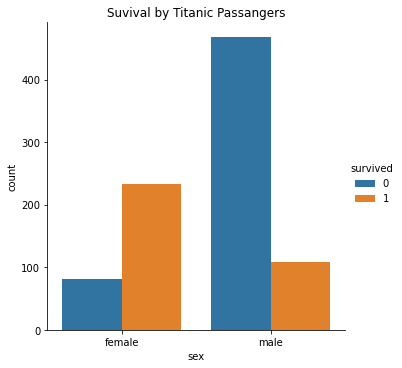

In [359]:
# Did more women or men die on the Titanic?
plt.figure(figsize=(10,7))
sns.catplot(x ="sex", hue ="survived", kind ="count", data = titanic)
plt.title("Suvival by Titanic Passangers")

From this plot we can see that more men died the Titanic than women. You were more likely to survive if you were female. 

##### Survival by passenger class

Text(0.5, 1.0, 'Suvival by Titanic Passangers')

<Figure size 720x504 with 0 Axes>

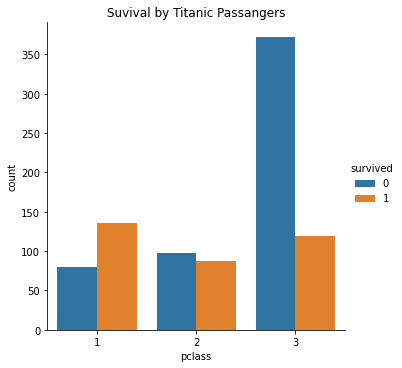

In [360]:
# Which passenger class was more likely to survive?
plt.figure(figsize=(10,7))
sns.catplot(x ="pclass", hue='survived', kind ='count', data = titanic)
plt.title("Suvival by Titanic Passangers")

From this plot, we can see that if you were in 1st class, you were more likely to survive, while second and third class were less likely to survive. We can also see that Third Class had the highest number of deaths on the Titanic.

##### Distribution of Fare

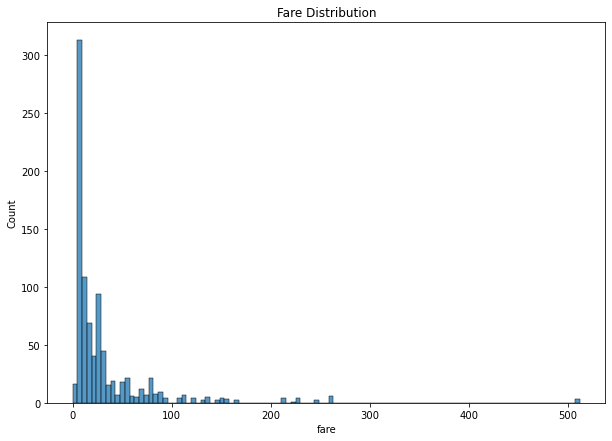

In [361]:
plt.figure(figsize=(10,7))
sns.histplot(data=titanic, stat="count", x='fare')
plt.title("Fare Distribution")
plt.show()

Looking at the distribution of the fare, majority of the tickets sold were below 50 dollars, with of tickets sold around the $10 price. We do have a couple of outliers with a couple above 200 dollars and one greater than 500 dollars. 

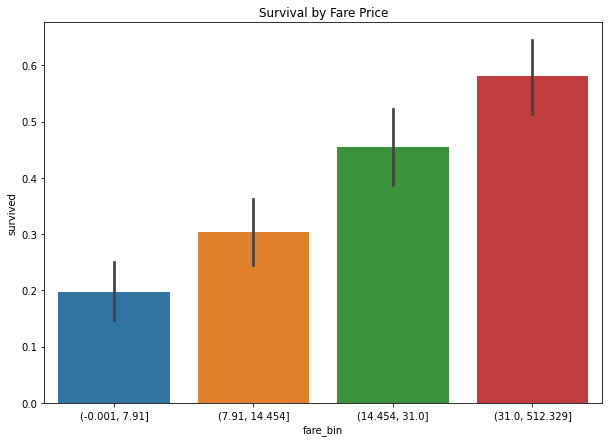

In [362]:
# Looking at the titanic fare attribute via bar plot. 
titanic['fare_bin'] = pd.qcut(titanic['fare'], 4)

#bar plot of the fare range
plt.figure(figsize=(10,7))
sns.barplot(x ='fare_bin',  y= 'survived', data = titanic)
plt.title("Survival by Fare Price")
plt.show()

Here I looked binning the data into 4 equal sized bins and then looked at their chance of survival. From here we can see that a higher fare price passenger had a greater chance of survival on the Titanic than a passenger with a lower price fare.

##### Distribution of Age

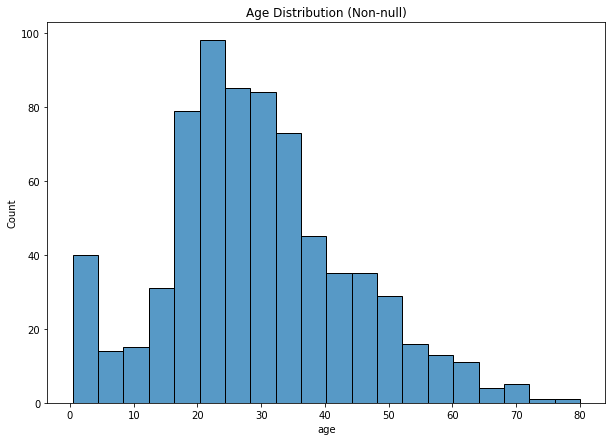

In [363]:
plt.figure(figsize=(10,7))
df1 = titanic[titanic['age'].notnull()]
sns.histplot(df1['age'])
plt.title("Age Distribution (Non-null)")
plt.show()

Here we can see that the age distribution ranged from months old to 80 years old. A large portion of the passangers were in the upper teenage years to mid-30s. The next largest group was the 40 to mid-50s age.

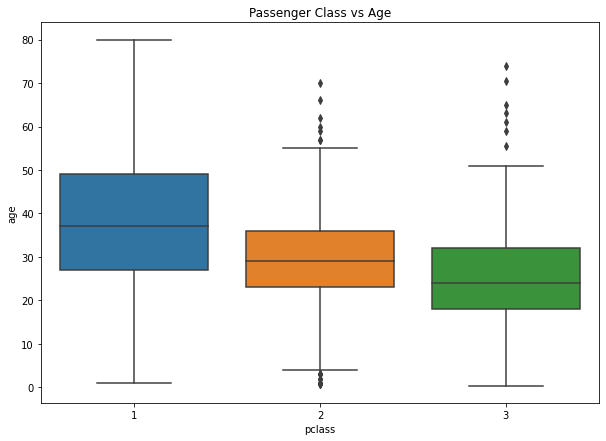

In [364]:
# Median Age by Box Plot
plt.figure(figsize=(10,7))
sns.boxplot(data = df1, x = 'pclass', y='age')
plt.title("Passenger Class vs Age")
plt.show()

Looking at the boxplot for the ages by passenger class, we see in Class 1 the median age is around 38, Class 2 median age is about 30, and Class 3 is about 26. We can see that Class 1 has the largest range of ages, while Class 3 has the smallest range of ages. 

In [365]:
med1 = titanic[titanic['pclass'] == 1]['age'].median()
med2 = titanic[titanic['pclass'] == 2]['age'].median()
med3 = titanic[titanic['pclass'] == 3]['age'].median()

In [366]:
print(med1)
print(med2)
print(med3)

37.0
29.0
24.0


When calculating the actual means of each we see that Class 1 median age is 37, Class 2 is 29, and Class 3 is 24. 

## Part 2
Since there are so many missingvaluesin Cabin, get rid of the cabin feature. Define a function to impute age using the median of the passenger class you computed earlier. To call it, use train[[‘age’, pclass]].apply(impute_age,axis=1). Drop the remaining records containing null values. Show there are no remaining null values. Convert categorical variables to numeric dummies using pandas’ get_dummies() method. Add these to your training dataframe. Drop the categorical columns you converted earlier aswell asname, ticket, and passengerId. Create a feature set by dropping “Survived.” Your resulting feature set should include pclass, age, sibsp, parch, fare, and thecategorical dummy columns you created earlier. Implement a label dataframebycopying the contents of the Survived column of your training set to a newdataframe. Split your clean data into a training and test set.

In [367]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,0,0,"(-0.001, 7.91]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,1,0,"(31.0, 512.329]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,1,1,"(7.91, 14.454]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,1,0,"(31.0, 512.329]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,0,1,"(7.91, 14.454]"


In [368]:
# Dropping column deck feature, and other non-necessary features
titanic.drop(columns=['deck', 'alive', 'fare_bin', 'who'], inplace =True)

In [369]:
def impute_age(x):
    """Uses median age of pclass to fix the null values in the age attribute"""
    if x['pclass'] == 1:
        if math.isnan(x['age']):
            return med1
        else:
            return x['age']
    elif x['pclass'] == 2:
        if math.isnan(x['age']):
            return med2
        else:
            return x['age']
    elif x['pclass'] == 3:
        if math.isnan(x['age']):
            return med3
        else:
            return x['age']
    
titanic['age'] = titanic[['age','pclass']].apply(impute_age,axis=1)

In [370]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
adult_male     0
embark_town    2
alone          0
dtype: int64

In [371]:
# Drop the remaining records the are missing.
titanic.dropna(inplace = True)

In [372]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
adult_male     0
embark_town    0
alone          0
dtype: int64

##### Convert Categorical Variables to Dummy Variables

Creating a dummy for pclass as well since we are dealing with Class 1, Class 2, and Class 3. Each class could be important in determining whether a passenger lives or dies. 

In [373]:
for col in ['pclass', 'sex', 'embarked', 'class', 'embark_town']:
    temp = pd.get_dummies(titanic[col],prefix=col, prefix_sep='')
    titanic= pd.concat([titanic, temp], axis=1)
titanic.rename(columns={1: '1', 2:'2', 3:'3'}, inplace = True)

In [374]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,...,sexmale,embarkedC,embarkedQ,embarkedS,classFirst,classSecond,classThird,embark_townCherbourg,embark_townQueenstown,embark_townSouthampton
0,0,3,male,22.0,1,0,7.2500,S,Third,1,...,1,0,0,1,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,0,...,0,1,0,0,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,0,...,0,0,0,1,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,0,...,0,0,0,1,1,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,1,...,1,0,0,1,0,0,1,0,0,1


In [375]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'adult_male', 'embark_town', 'alone', 'pclass1',
       'pclass2', 'pclass3', 'sexfemale', 'sexmale', 'embarkedC', 'embarkedQ',
       'embarkedS', 'classFirst', 'classSecond', 'classThird',
       'embark_townCherbourg', 'embark_townQueenstown',
       'embark_townSouthampton'],
      dtype='object')

In [376]:
# dropping name essential columns
titanic.drop(columns = ['pclass', 'sex', 'embarked', 'class', 'embark_town'], inplace = True)

In [377]:
# copying dataframe to a new dataframe
titanicdf = titanic.copy()

##### Creating Train and Test Sets

In [378]:
#Sruvived column will be the target column. Doing a 70/30 split
from sklearn.model_selection import train_test_split
y = titanicdf['survived']
X = titanicdf.drop('survived', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Part 3 Model Training

Implement a logistic regression model. Implement a support vector classifier. Implement an sgd classifier. Print out theclassification reports, confusion matrices, and roc score and chart for each of these. Remember to set Probability=True for SVM and use method=decision_function in a cross_val_predict instead of predict_probafor theSGD ROC plot.

In [379]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

##### Logistist Regression Model

In [380]:
lgm = LogisticRegression(max_iter=500)
lgm.fit(X_train, y_train)
lgm_preds = lgm.predict(X_test)
print(classification_report(y_test, lgm_preds))
print(confusion_matrix(y_test, lgm_preds))
print(roc_auc_score(y_test, lgm_preds))


              precision    recall  f1-score   support

           0       0.84      0.87      0.86       167
           1       0.78      0.73      0.75       100

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267

[[146  21]
 [ 27  73]]
0.802125748502994


C:\Users\15599\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


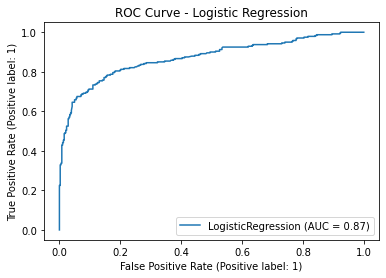

In [381]:
plot_roc_curve(lgm, X_train, y_train)
plt.title("ROC Curve - Logistic Regression")
plt.show()

##### SGDClassifier

In [382]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_preds = sgd.predict(X_test)
print(classification_report(y_test, sgd_preds))
print(confusion_matrix(y_test, sgd_preds))
print(roc_auc_score(y_test, sgd_preds))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       167
           1       0.65      0.58      0.61       100

    accuracy                           0.73       267
   macro avg       0.71      0.70      0.70       267
weighted avg       0.72      0.73      0.72       267

[[136  31]
 [ 42  58]]
0.697185628742515


C:\Users\15599\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


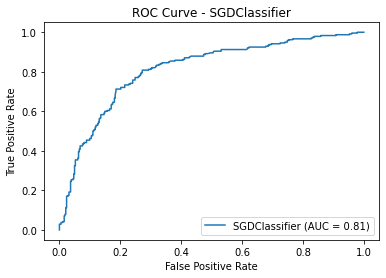

In [383]:
plot_roc_curve(sgd, X_train, y_train, response_method='decision_function')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve - SGDClassifier")
plt.show()

##### SVC Model 

In [384]:
svc = SVC(probability = True)
svc.fit(X_train, y_train)
svc_preds = sgd.predict(X_test)
print(classification_report(y_test, svc_preds))
print(confusion_matrix(y_test, svc_preds))
print(roc_auc_score(y_test, svc_preds))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       167
           1       0.65      0.58      0.61       100

    accuracy                           0.73       267
   macro avg       0.71      0.70      0.70       267
weighted avg       0.72      0.73      0.72       267

[[136  31]
 [ 42  58]]
0.697185628742515


C:\Users\15599\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


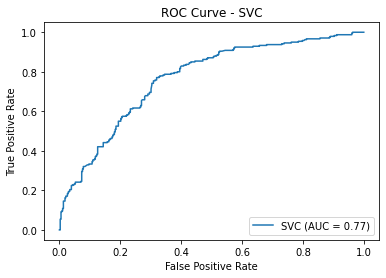

In [385]:
plot_roc_curve(svc, X_train, y_train)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve - SVC")
plt.show()

## Part 4 Model Tuning
* See if scaling your input data affects your SVC model (implement a sklearn pipeline to combine scaling and instantiation of your model). 
* Do a grid search of your pipeline classifier using the following parameter grid: {‘<your_svc_model_name>__kernel’: [‘rbf’], ‘<your_svc_model_name> __gamma’: [0.0001, 0.001, 0.01, 0.1, 1], ‘{‘<your_svc_model_name>__C’: [1,10,50,100,200,300]}. 
* Print the best estimator, its parameters, and the resulting score. Apply this estimator to your test set
* Implement a learning curve using your best estimator fromthe gridsearch. 
    * The figure should have a title of “learning curve.” 
     * Label the y-axis with “Score.” 
     * Label the x-axis with “Training Examples.” 
     * Make the training score red. 
     * Make the validation score green. 
     * What does this learning curve tell you?


In [386]:
#Scaling the continuous variables utlizing the min_max scaling since we are working with 0 and 1 in majority of our categorical variables
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [387]:
pipe = Pipeline([('minmax', MinMaxScaler()), ('svc', SVC(probability = True))])
pipe.steps

[('minmax', MinMaxScaler()), ('svc', SVC(probability=True))]

In [388]:
new_params = {'svc__kernel':['rbf'], 'svc__gamma':[0.0001, 0.001, 0.01, 0.1, 1], 'svc__C':[1,10,50,100,200,300]}
grid_svc = GridSearchCV(estimator = pipe, param_grid = new_params, scoring="roc_auc")
grid_svc.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('minmax', MinMaxScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [1, 10, 50, 100, 200, 300],
                         'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             scoring='roc_auc')

In [389]:
print('Pipeline SVC best estimator:')
print(grid_svc.best_estimator_)
print()
print('Pipeline SVC best params:')
print(grid_svc.best_params_)
print()
print('Pipeline SVC best auc score:')
print(grid_svc.best_score_)

Pipeline SVC best estimator:
Pipeline(steps=[('minmax', MinMaxScaler()),
                ('svc', SVC(C=10, gamma=1, probability=True))])

Pipeline SVC best params:
{'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'rbf'}

Pipeline SVC best auc score:
0.8494937628161312


##### Applying the estimator to our test set and utilizing the pipeline

In [390]:
pipe = grid_svc.best_estimator_
pipe.fit(X_train, y_train)
pipe_test = pipe.predict(X_test)

print(classification_report(y_test, pipe_test))
print(confusion_matrix(y_test, pipe_test))
print(roc_auc_score(y_test, pipe_test))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       167
           1       0.83      0.64      0.72       100

    accuracy                           0.82       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.82      0.82      0.81       267

[[154  13]
 [ 36  64]]
0.7810778443113773


Looking at the new ROC AUC score it did increase with the new parameters from 0.6995 to 0.7810, indicating the new SVC model is better. The precision and recall score increased as well. 

##### Implementing a learning curve from the best estimator of SVC model found from GridSearch

In [391]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores_svr, validation_scores_svr = learning_curve(pipe, X_train, y_train, scoring = 'roc_auc')


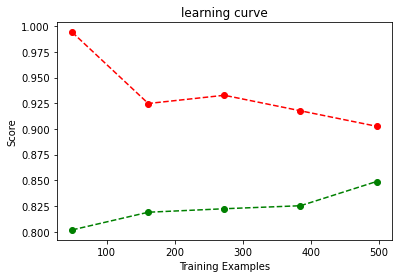

In [392]:
plt.plot(train_sizes, train_scores_svr.mean(1), "o--", color = 'red', label = 'Train')
plt.plot(train_sizes, validation_scores_svr.mean(1), "o--", color = 'green', label = 'Validation')
plt.title('learning curve')
plt.ylabel('Score')
plt.xlabel('Training Examples')
plt.show()

##### What does this learning curve tell you?

When looking at the graph we see that the training and the validation curve are starting to converge at the best ROC AUC Score. As we train the model more, we will be able to remove more of the variance and select the best parameters, resulting in the two lines getting closer to meeting as a point ultimately selecting the best model. 